# Pertemuan 9
- Image Pyramid
    - Gaussian Pyramid 
    - Laplacian Pyramid
    - CUDA Implementation
- Image Gradient
    - Sobel and Scharr Derivatives 
    - Laplacian Derivatives 
    - Histogram of Gradient (HOG) for Feature Extraction
___
### Maximizing Jetson Nano Perfomance

In [ ]:
# sudo nvpmodel -m 0
# sudo jetson_clocks

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# check OpenCV Version

cv2.__version__

___
# 1. Image Pyramid

<img src="resource/Pyramids.png" style="width:400px"></img>
- An image pyramid is a collection of images - all arising from a single original image - that are successively downsampled until some desired stopping point is reached.
- Although there is a *geometric transformation* function in OpenCV that -literally- resize an image (`cv2.resize()`), in this section we will use of Image Pyramids, which are widely applied in a huge range of vision applications.
- There are two common kinds of image pyramids:
    - **Gaussian pyramid**: Used to **downsample** & **upsampled** images
    - **Laplacian pyramid**: Used to reconstruct an **upsampled** image from an image lower in the pyramid (with less resolution)<br><br><br><br>
___
## 1.1 Gaussian Pyramid
- Imagine the pyramid as a set of layers in which the higher the layer, the smaller the size.
- Every layer is numbered from bottom to top, so layer ($i+1$) (denoted as $G_i+1$ is smaller than layer $i ( G_i)$.<br><br>
<img src="resource/Pyramids_Tutorial_Pyramid_Theory.png" style="width:400px"></img><br><br><br>

- To produce layer ($i+1$) in the Gaussian pyramid, we do the following:
    - **Convolve** $G_i$ with a *Gaussian kernel*:<br>
    $\frac{1}{16} \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$
    - Remove every even-numbered row and column.   
- The resulting image will be exactly *one-quarter* the area of its predecessor. Iterating this process on the input image $G_0$ (original image) produces the entire pyramid.
- The procedure above was useful to **downsample** an image. What if we want to make it bigger?
    - First, **upsize** the image to twice the original in each dimension, with the new even rows and
    - Perform a**convolution** with the same kernel shown above (multiplied by 4) to approximate the values of the "missing pixels"


- Downsampling and upsampling method in OpenCV is used `cv2.pyrUp(img, dstsize, borderType)` and `cv2.pyrDown(img, dstsize, borderType)`
- where :
    - `img` : input image
    - `dstsize` : image destination size, default ($0.5 w, 0.5 h$) for downscale, ($2w, 2h$) for upscale.
    - `borderType` :
        - `cv2.BORDER_DEFAULT`
        - `cv2.BORDER_CONSTANT`
        - `cv2.BORDER_REPLICATE`
        - `cv2.BORDER_REFLECT`
        - `cv2.BORDER_WRAP`
        - `cv2.BORDER_ISOLATED`

____
## EXSAMPLE 1 | Downscale Image

In [ ]:
# load image
img = cv2.imread("lena.jpg")
h, w, c = img.shape

# apply down scaling to (0.5w, 0.5h)
img_PD = cv2.pyrDown(img, dstsize=(w//2, h//2))

# show result
cv2.imshow("pyramid downscale 1/2", img_PD)
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## EXSAMPLE 2 | Upscale Image

In [ ]:
# load image
img = cv2.imread("lena.jpg")
h, w, c = img.shape

# apply up scaling to (2w, 2h)
img_PU = cv2.pyrUp(img, dstsize=(w*2, h*2))

# show result
cv2.imshow("pyramid upscale 2x", img_PU)
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## EXSAMPLE 3 | Downscale & Upscale Image by press key

In [ ]:
# load image
img = cv2.imread("lena.jpg")

while True :
    h, w, c = img.shape
    # show image
    cv2.imshow("Result Window", img)
    
    key = cv2.waitKey(0)
    if key == ord("q"):
        break
    elif key == ord('i'):
        # apply up scaling to (2w, 2h)
        img = cv2.pyrUp(img, dstsize=(w*2, h*2))
        print ('Zoom In: Image x 2')
        
    elif key == ord('o'):
        # apply down scaling to (0.5w, 0.5h)
        img = cv2.pyrDown(img, dstsize=(w//2, h//2))
        print ('Zoom Out: Image / 2')

cv2.destroyAllWindows()

___
# 1.2 Laplacian Pyramid

- **Laplacian Pyramid** can be used for **edge detection**.
- $i$ layer on **Laplacian Pyramid** ($L_i$) created by **Gaussian Pyramid** $i$ ($G_i$) substracted by `cv2.pyrUp()` for Gaussian Pyramid layer in $i + 1$ (($G_{i+1}$)).<br><br>
$L_i = G_i - pyrUp(G_{i+1})$<br><br>
<img src="resource/Laplacian-Pyramids.png" style="width:400px"></img><br>
*Example of 3 stage Laplacian Pyramid* 

## EXSAMPLE 4 | Apply Laplacian Pyramid (Single Stage)
<img src="resource/Laplacian-Pyramids-1.png" style="width:500px"></img>

In [ ]:
# load image
GP_0 = cv2.imread("lena.jpg") # 512x512

GP_1 = cv2.pyrDown(GP_0) # 256x256 --> downscale (gaussian pyramid)
LP_0 = cv2.subtract(GP_0, cv2.pyrUp(GP_1)) # 512x512 --> laplacian pyramid

# show result
cv2.imshow("GP 0", GP_0)
cv2.imshow("GP 1", GP_1)
cv2.imshow("LP 0", LP_0)
cv2.waitKey(0)
cv2.destroyAllWindows()

## EXSAMPLE 4 | Apply Laplacian Pyramid (3 Stage)
<img src="resource/Laplacian-Pyramids.png" style="width:500px"></img>

In [ ]:
# define empty list of all Gaussian Pyramid Image
GP_list = []

plt.figure(figsize=(20,5))

# load Original Image
GP = cv2.imread("lena.jpg")

plt.subplot(1, 4, 1)
plt.imshow(GP[:,:,::-1])
plt.title(GP.shape)

# Insert Original Image as Base Gaussian Pyramid (512x512)
GP_list.append(GP) 


for i in range (2, 5): # --> i : {2, 3, 4}

    # Apply Gaussian Pyramid & Append to list
    GP = cv2.pyrDown(GP)
    GP_list.append(GP)

    # show image
    plt.subplot(1, 4, i)
    plt.imshow(GP[:,:,::-1])
    plt.title(GP.shape)

- On above implementation, we have, <br><br>
    $GP_0$ : 512x512 (original image)<br>
    $GP_1$ : 256x256 <br>
    $GP_2$ : 128x128 <br>
    $GP_3$ : 64x64 <br><br>
- Next, try to calculate $LP_i$, where $LP_i = GP_i - pyrUp(GP_{i+1})$, <br><br>
    $LP_0$ : 64x64 (lowest GP image $GP_3$) <br>
    $LP_1$ : 128x128 ($GP_2 - pyrUp(GP_3)$) <br>
    $LP_2$ : 256x256 ($GP_1 - pyrUp(GP_2)$) <br>
    $LP_3$ : 512x512 ($GP_0 - pyrUp(GP_1)$) <br>

In [ ]:
list()

In [ ]:
plt.figure(figsize=(20,5))

LP = GP_list[-1] # insert lower GP image (index -1) to LP

plt.subplot(1, 4, 1)
plt.imshow(LP[:,:,::-1])
plt.title(LP.shape)

for i in range(-2, -5, -1): # ---> i : {-2, -3, -4}
    LP =  cv2.subtract(GP_list[i], cv2.pyrUp(GP_list[i+1])) # GPi - pyrUp(GPi+1)

    # show result
    plt.subplot(1, 4, -1*i)
    plt.imshow(LP[:,:,::-1])
    plt.title(LP.shape)

____
## IMPLEMENTATION : Image Pyramid for Image Stitching

- Simple Striching using Numpy slicing (just for comparion)

In [ ]:
# VERTICAL STITCHING (NUMPY)

# load image img1 & img2 (img1 & img2 have the same size)
img1 = cv2.imread("apple.jpg")
img2 = cv2.imread("orange.jpg")

h, w, c = img1.shape
print(h,w,c)

# create 
result = np.zeros_like(img1) # create black image with size & type similar to img1
result[:, :w//2] = img1[:, :w//2] # fill left side result matrix by left side img1
result[:, w//2:] = img2[:, w//2:] # fill right side result matrix by right side img2

# show result
cv2.imshow("stiching image", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# HORIZONTAL STITCHING (NUMPY)

# load image img1 & img2 (img1 & img2 have the same size)
img1 = cv2.imread("apple.jpg")
img2 = cv2.imread("orange.jpg")

h, w, c = img1.shape
print(h,w,c)

# create 
result = np.zeros_like(img1) # create black image with size & type similar to img1
result[:h//2, :] = img1[:h//2, :] # fill upper side result matrix by left side img1
result[h//2:, :] = img2[h//2:, :] # fill lower side result matrix by right side img2

# show result
cv2.imshow("stiching image", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# NOTE
# Simple image stitching using numpy may not look good due to discontinuities between images.

- Simple Image Stitching using Image Pyramid

In [ ]:
# VERTICAL STITCHING (IMAGE PYRAMID)

# load image img1 & img2 (img1 & img2 have the same size)
img1 = cv2.imread("apple.jpg")
img2 = cv2.imread("orange.jpg")

# Apply Gausian Pyramid to Image 1 and Image 2 and store into GP1_list & GP2_list
GP1 = img1.copy()
GP1_list = [GP1] 
for i in range (6):
    GP1 = cv2.pyrDown(GP1)
    GP1_list.append(GP1)

GP2 = img2.copy()
GP2_list = [GP2] 
for i in range (6):
    GP2 = cv2.pyrDown(GP2)
    GP2_list.append(GP2)
    
# Apply Laplacian Pyramid to Image 1 and Image 2 to generate Edge Image and store into LP1_list & LP2_list
LP1_list = [GP1_list[-1]]  # insert lower GP1 image (index -1) to LP1
for i in range (-2, -7, -1): # ---> i : {-2, -3, -4, -5, -6}
    LP1 =  cv2.subtract(GP1_list[i], cv2.pyrUp(GP1_list[i+1])) # GPi - pyrUp(GPi+1)
    LP1_list.append(LP1)
    
LP2_list = [GP2_list[-1]] # insert lower GP2 image (index -1) to LP2
for i in range (-2, -7, -1): # ---> i : {-2, -3, -4, -5, -6}
    LP2=  cv2.subtract(GP2_list[i], cv2.pyrUp(GP2_list[i+1])) # GPi - pyrUp(GPi+1)
    LP2_list.append(LP2)

# Stithing the laplacian image for all stage
LS = [] 
for L1, L2 in zip(LP1_list, LP2_list):
    h, w, c = L1.shape

    result = np.zeros_like(L1) # create black image with size & type similar to Laplacian Image 1
    result[:h//2, :] = L1[:h//2, :] # fill upper side result matrix by left side Laplacian Image 1
    result[h//2:, :] = L2[h//2:, :] # fill lower side result matrix by right side Laplacian Image 2
    LS.append(result)


# Add all stiched image into a single image called 'output'
output = LS[0]
for i in range(1, 6):
    output = cv2.add(cv2.pyrUp(output), LS[i]) # output_i = pyrUp(output_i-1) + LSi
    

cv2.imshow("stiching image pyramid", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

____
## PERFORMANCE COMPARIOSN EDGE DETECTION 
## (Canny Edge Detection vs Morphological Gradient vs Laplacian Pyramid)

In [ ]:
# EDGE DETECTION -- MORPHOLOGICAL GRADIENT

times =[]
for i in range (100) :
    e1 = cv2.getTickCount()
    # load image
    img = cv2.imread('number_plate.jpg')

    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply morphological gradient with kernel 3x3
    kernel = np.ones((3,3),np.uint8)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)

    # apply simple thresholding TOZERO 
    ret, thresh = cv2.threshold(gradient, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)

    # find contour & draw contour from binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for cnt in contours:
        cv2.drawContours(img, [cnt], -1, (0,0,255), 1)

    e2 = cv2.getTickCount()
    t = (e2 - e1)/cv2.getTickFrequency()
    times.append(t)

print("Average execution : %.5f s" % np.array(times).mean())
# show image
cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# EDGE DETECTION -- CANNY EDGE DETECTION

times =[]
for i in range (100) :
    e1 = cv2.getTickCount()
    # load image
    img = cv2.imread('number_plate.jpg')

    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply Canny Edge Detection
    canny = cv2.Canny(gray, 220, 230)

    # apply simple thresholding TOZERO 
    ret, thresh = cv2.threshold(canny, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)

    # find contour & draw contour from binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for cnt in contours:
        cv2.drawContours(img, [cnt], -1, (0,0,255), 1)

    e2 = cv2.getTickCount()
    t = (e2 - e1)/cv2.getTickFrequency()
    times.append(t)

print("Average execution : %.5f s" % np.array(times).mean())
# show image
cv2.imshow("Canny Edge Detection", canny)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# EDGE DETECTION -- CANNY LAPLACIAN PYRAMID
times =[]
for i in range (100) :
    e1 = cv2.getTickCount()
    # load image
    img = cv2.imread('number_plate.jpg')

    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply Laplacian Pyramid
    GP0 = cv2.pyrDown(gray) # --> downscale (gaussian pyramid)
    GP1 = cv2.pyrDown(GP0) # --> downscale (gaussian pyramid)
    LP0 = cv2.subtract(gray, cv2.pyrUp(GP0)) # --> laplacian pyramid
    LP1 = cv2.subtract(gray, cv2.pyrUp(GP1)) # --> laplacian pyramid

    # apply simple thresholding TOZERO 
    ret, thresh = cv2.threshold(LP, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)

    # find contour & draw contour from binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for cnt in contours:
        cv2.drawContours(img, [cnt], -1, (0,0,255), 1)

    e2 = cv2.getTickCount()
    t = (e2 - e1)/cv2.getTickFrequency()
    times.append(t)

print("Average execution : %.5f s" % np.array(times).mean())
# show image
cv2.imshow("Laplacian Pyramid", LP)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## CUDA Implementation Image Pyramid
- Method `cv2.cuda.pyrUp(src, dst)` and `cv2.cuda.pyrDown(src, dst)`
- Where : 
    - `src` : image input CUDA Matrix 
    - `dst` : image input CUDA Matrix 

In [ ]:

# load image in Host memory
img = cv2.imread("lena.jpg")
h, w, c = img.shape

# GPU memory initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
up_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
up_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
down_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
down_GpuMat.create((w//2, h//2), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
laplacian_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
laplacian_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel

# upload to GPU memory
img_GpuMat.upload(img)

# apply CUDA Gaussian Pyramid
cv2.cuda.pyrDown(img_GpuMat, down_GpuMat)  # downscale
cv2.cuda.pyrUp(down_GpuMat, up_GpuMat) # upscale

# Apply Laplacian Pyramid
cv2.cuda.subtract(img_GpuMat, up_GpuMat, laplacian_GpuMat)

# download to host memory
GP = down_GpuMat.download()
LP = laplacian_GpuMat.download()

# show image
cv2.imshow("Gaussian Pyramid", GP)
cv2.imshow("Laplacian Pyramid", LP)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

_____
# 2. Image Gradient
- An image gradient is a directional change in the intensity or color in an image. 
- The gradient of the image is one of the fundamental building blocks in image processing. 
- For example, the **Canny edge detector** uses image gradient for edge detection. 
- Image gradients can be used to extract information from images. 
- Gradient images are created from the original image (generally by convolving with a filter, one of the simplest being the Sobel filter) for this purpose.[WIKIPEDIA](https://en.wikipedia.org/wiki/Image_gradient) <br><br><br><br>
- On the left, an intensity image of a cat. 
- In the center, a gradient image in the x direction measuring horizontal change in intensity. 
- On the right, a gradient image in the y direction measuring vertical change in intensity. 
- Gray pixels have a small gradient; black or white pixels have a large gradient.
![](resource/image_grad.png) <br><br>

- Two types of gradients, with blue arrows to indicate the direction of the gradient. Dark areas indicate higher values. <br>
![](resource/Gradient.png) <br><br>
- OpenCV provides three types of gradient filters or High-pass filters, **Sobel**, **Scharr** and **Laplacian**. We will see each one of them.
<br><br><br>
____
## 2.1 Sobel and Scharr Derivatives
- Sobel operators is a joint **Gausssian smoothing** plus **differentiation operation**, so it is **more resistant to noise**.
- You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). 
- You can also specify the size of kernel by the argument ksize. 
- If `ksize = -1`, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. 
- Method `cv2.Sobel(img, ddepth, dx, dy, ksize)`
- Where : 
    - `img` : input image
    - `ddepth` : image destitation depth, should be `cv2.CV_32F` or `cv2.CV_64F`
    - `dx` : order of the derivative x.
    - `dy` : order of the derivative y.
    - `ksize` : size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

## 2.2 Laplacian Derivatives
- It calculates the Laplacian of the image given by the relation, $\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$ where each derivative is found using Sobel derivatives. 
- If `ksize = 1`, then following kernel is used for filtering: <br>
![](resource/laplacian_dev.png)

____
## EXAMPLE 1 : Sobel Derivative & Laplacian Derivative feature image

In [ ]:
# load image
img = cv2.imread('sudoku.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply sobel derivative for X and Y direction with kernel size 5x5
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

# apply laplacian derivative
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# show the result
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original') 

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')

____
## EXAMPLE 2 : Sobel Derivative & Laplacian Derivative to detect Edge 
- If you want to detect **both edges**, better option is to keep the output datatype to some higher forms, like `cv2.CV_16S`, `cv2.CV_64F` etc, 
- Take its **absolute value** and then convert back to `cv2.CV_8U`.

In [ ]:
# EXAMPLE | Edge Detection, convert cv2.CV_64F to cv2.CV_8U image 

# load image
img = cv2.imread('box_edge.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply sobel derivative for X and Y direction with kernel size 5x5
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

# apply laplacian derivative
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))
laplacian = np.uint8(np.absolute(laplacian))

# show the result
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original') 

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')

In [ ]:
# EXAMPLE | Edge Detection, Set cv2.Sobel & cv2.Laplacian with ddepth cv2.CV_8U

# load image
img = cv2.imread('box_edge.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply sobel derivative for X and Y direction with kernel size 5x5
sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=5)

# apply laplacian derivative
laplacian = cv2.Laplacian(gray, cv2.CV_8U)


# show the result
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original') 

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')

____
## CUDA Implementation Image Gradient
### CUDA Sobel Derivative
- Create Object using class `cv2.cuda.createSobelFilter(srcType, dstType, dx, dy, ksize)`
    - `srcType` : Source image type. 
    - `dstType` : Destination array type. only supported until `cv2.CV_32F`.
    - `dx` : Derivative order in respect of x.
    - `dy` : Derivative order in respect of y.
    - `ksize` : Size of the extended Sobel kernel. Possible values are 1, 3, 5 or 7.
- Use method `.apply(src, dst)` to generate sobel derivative images.
- Where : 
    - `src` : Input Image Matrix (GPU Mat)
    - `dst` : Output Image Matrix (GPU Mat)<br><br><br>
### CUDA Laplacian Derivative
- Create Object using class `cv2.cuda.createLaplacianFilter(srcType, dstType, ksize)`
    - `srcType` : Source image type.
    - `dstType` : Destination array type. only supported until `cv2.CV_32F`.
    - `ksize` : Size of the extended Sobel kernel. Only `ksize = 1` and `ksize = 3` are supported.
- Use method `.apply(src, dst)` to generate sobel derivative images.
- Where : 
    - `src` : Input Image Matrix (GPU Mat)
    - `dst` : Output Image Matrix (GPU Mat)

Text(0.5,1,'Sobel Y')

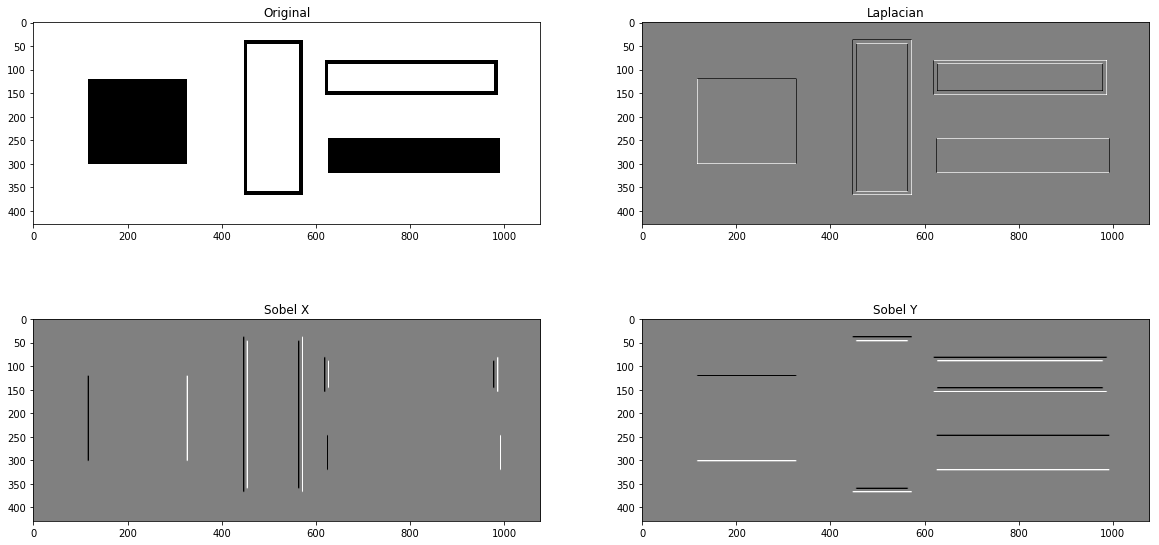

In [54]:

# load image in Host memory
img = cv2.imread("box_edge.png")
h, w, c = img.shape

# GPU memory initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_32FC3) # cv2.CV_32FC1 -> 32 float image 3 channel
gray_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
gray_GpuMat.create((w, h), cv2.CV_32FC1) # cv2.CV_32FC1 -> 32 float image 1 channel
sobelx_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
sobelx_GpuMat.create((w, h), cv2.CV_32FC1) # cv2.CV_32FC1 -> 32 float image 1 channel
sobely_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
sobely_GpuMat.create((w, h), cv2.CV_32FC1) # cv2.CV_32FC1 -> 32 float image 1 channel
laplacian_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
laplacian_GpuMat.create((w, h), cv2.CV_32FC1) # cv2.CV_32FC1 -> 32 float image 1 channel

# Create object CUDA Image Gradient
SobelX_obj = cv2.cuda.createSobelFilter(cv2.CV_32F, cv2.CV_32F, 1, 0, ksize=5)
SobelY_obj = cv2.cuda.createSobelFilter(cv2.CV_32F, cv2.CV_32F, 0, 1, ksize=5)
Laplacian_obj = cv2.cuda.createLaplacianFilter(cv2.CV_32F, cv2.CV_32F, ksize=3)

# upload to GPU memory as 32 bit float image
img_GpuMat.upload(img.astype(np.float32))

# convert to grayscale
cv2.cuda.cvtColor(img_GpuMat, cv2.COLOR_BGR2GRAY, gray_GpuMat)

# apply CUDA Image Gradient
SobelX_obj.apply(gray_GpuMat, sobelx_GpuMat)
SobelY_obj.apply(gray_GpuMat, sobely_GpuMat)
Laplacian_obj.apply(gray_GpuMat, laplacian_GpuMat)


# download to host memory
sobelx = sobelx_GpuMat.download()
sobely = sobely_GpuMat.download()
laplacian = laplacian_GpuMat.download()

# show the result
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original') 

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(2,2,4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')

___
# Source
- [https://docs.opencv.org/4.5.1/d4/d1f/tutorial_pyramids.html](https://docs.opencv.org/4.5.1/d4/d1f/tutorial_pyramids.html)
- [https://en.wikipedia.org/wiki/Pyramid_(image_processing)](https://en.wikipedia.org/wiki/Pyramid_(image_processing))
- [https://docs.opencv.org/4.5.1/d5/d0f/tutorial_py_gradients.html](https://docs.opencv.org/4.5.1/d5/d0f/tutorial_py_gradients.html)
- [https://en.wikipedia.org/wiki/Image_gradient](https://en.wikipedia.org/wiki/Image_gradient)
- [https://docs.opencv.org/3.4.15/d2/d77/classcv_1_1cuda_1_1ImagePyramid.html](https://docs.opencv.org/3.4.15/d2/d77/classcv_1_1cuda_1_1ImagePyramid.html)
- [https://docs.opencv.org/4.5.3/dc/d66/group__cudafilters.html#ga53126e88bb7e6185dcd5628e28e42cd2](https://docs.opencv.org/4.5.3/dc/d66/group__cudafilters.html#ga53126e88bb7e6185dcd5628e28e42cd2)
- [https://docs.opencv.org/4.5.3/dc/d66/group__cudafilters.html#gabf85fe61958bb21e93211a6fcc7c5c3b](https://docs.opencv.org/4.5.3/dc/d66/group__cudafilters.html#gabf85fe61958bb21e93211a6fcc7c5c3b)